# **Linear Regression**

Linear Regression is a statistical method used to model the relationship between a Dependent Variable (the target we want to predict) and one or more Independent Variables (the features used to make the prediction).

***Simple vs. Multiple Regression***

Simple Linear Regression: Uses only one independent variable.Equation: $y = \beta_0 + \beta_1x + \epsilon$

Multiple Linear Regression: Uses two or more independent variables.Equation: $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

# Step One: Loading the data Set and libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#  load the data set
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df=pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

View the data set

In [4]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


# **PART A : SIMPLE LINEAR REGRESSION**

In this section we assume median income is the only factir affectinng house prices.

we shall divide the data into training set and testing set.

**Training set** is the portion of the dataset used to teach a model how to identify patterns and relationships and make predictions.

**Testing set** is  a portion of the dataset, held back until the very end of the model development process, to provide a final, unbiased evaluation of the model's performance on completely unseen data


In [6]:
# we shall use the meaian income as our feature and the target as House Value.

x_simple=df[['MedInc']]
y=df['MedHouseVal']

# Split the data set with 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x_simple,y,test_size=0.2,random_state=42)

# Create and train the model
from sklearn.linear_model import LinearRegression
model_simple= LinearRegression()
model_simple.fit(x_train, y_train)

LinearRegression()

Make the Predictions

In [7]:
y_pred_simple=model_simple.predict(x_test)

Visualise the line of Best fit

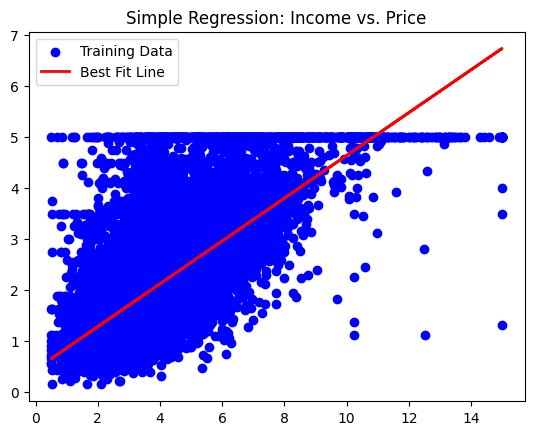

In [8]:
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_test, y_pred_simple, color='red', linewidth=2, label='Best Fit Line')
plt.title("Simple Regression: Income vs. Price")
plt.legend()
plt.show()

# **Multiple Linear Regression**

Real-world problems are rarely solved by one variable. Here, we use all features (Age, Location, Rooms, etc.) to improve the model.



In [ ]:
# use all columns except our target(same as the target used in linear regression)
x_multiple=df.drop('MedHouseVal',axis=1)

# split the data
x_train, x_test, y_train, y_test = train_test_split(x_multiple,y,test_size=0.2,random_state=42)

# Train the model
model_multiple= LinearRegression()
model_multiple.fit(x_train, y_train)

# Predict
y_pred_multiple=model_multiple.predict(x_test)

***Evaluating model Performance***

How do we tell if a model is good or not?

we use 2 different methods/metrics

1. mean Squared error: The average squared difference between actual and predicted values. The lowe the error the better.

2. R-squared(R^2): A score between 0 and 1 and tells us how much of the data variation is explained by the model. The higher the better.

In [ ]:
# Compare the results
mse = mean_squared_error(y_test, y_pred_multiple)
r2 = r2_score(y_test, y_pred_multiple)

print(f"Model Performance:")
print(f"- Mean Squared Error: {mse:.4f}")
print(f"- R-Squared Score: {r2:.4f}")

Model Performance:
- Mean Squared Error: 0.5559
- R-Squared Score: 0.5758
